### Project - Predict heart attack based on phisiological and physical parameters of the patient

https://www.kaggle.com/sulianova/cardiovascular-disease-dataset

### Action plan

1. Read, explore and clean the dataset
2. Plot main relations between variables to better understand the behaviour of the data.
3. Save organized data for posterior machine learning modeling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Dataset analysis and cleaning
1. Age | Objective Feature | age | int (days)
2. Height | Objective Feature | height | int (cm) |
3. Weight | Objective Feature | weight | float (kg) |
4. Gender | Objective Feature | gender | categorical code | 1 woman, 2 man
5. Systolic blood pressure | Examination Feature | ap_hi | int |
6. Diastolic blood pressure | Examination Feature | ap_lo | int |
7. Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
8. Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
9. Smoking | Subjective Feature | smoke | binary |
10. Alcohol intake | Subjective Feature | alco | binary |
11. Physical activity | Subjective Feature | active | binary |
12. Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

In [3]:
df_stroke = pd.read_csv('heart_parameters_data.csv', sep=';')
df_stroke.dropna(inplace=True)
original_size = df_stroke.size
original_size

910000

In [4]:
#Set appropiate column names for second dataset, according to the data in df_stroke
columns = ['Id','Age', 'Sex', 'Height', 'Weight','SystolicPressure', 'DiastolicPressure', 'Cholesterol', 'Diabetes', 'Smoker', 'Alcoholic',
           'ActiveSport','Target']
df_stroke.columns=columns

#Age was given in days, transform to years and round to closest integer
df_stroke['Age']=(df_stroke['Age']/365).astype(int) 

df_stroke.drop(axis=1, columns=['Id'], inplace=True)

In [5]:
df_stroke[df_stroke.duplicated()==True].size

38496

In [6]:
df_stroke.drop_duplicates(inplace=True) 
cleaned_size = df_stroke.size
cleaned_size

801504

In [14]:

#Caterogize diabetes column in only two catergories, 0 means normal and 1 means above normal or patient with diabetes (>100mg/dl blood sugar)
#df_stroke['Diabetes'] = pd.cut(df_stroke['Diabetes'], bins=[1,2,4],labels=[0,1], right=False)
#df_stroke['Diabetes'].astype(int)

print('Number of lost samples after cleaning stroke_predictorSet.csv: {:,.0f}%'.format((1- cleaned_size/original_size)*100))
df_stroke.head(5)


Number of lost samples after cleaning stroke_predictorSet.csv: 12%


,Age,Sex,Height,Weight,SystolicPressure,DiastolicPressure,Cholesterol,Diabetes,Smoker,Alcoholic,ActiveSport,Target
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [8]:
target = df_stroke.groupby(['Target'])

In [9]:
#We see that there are three parameters which are quite higher when there is a stroke - SystolicPressure, DiastolicPressure 
# and Cholesterol
target.mean()

,Age,Sex,Height,Weight,SystolicPressure,DiastolicPressure,Cholesterol,Diabetes,Smoker,Alcoholic,ActiveSport
Target,,,,,,,,,,,
0,51.220191,1.355471,164.424123,71.901184,120.528728,84.634743,1.231479,1.187429,0.098960,0.059419,0.810025
1,54.422835,1.356915,164.263212,77.018998,137.528734,109.660457,1.526921,1.282514,0.085632,0.053315,0.787588


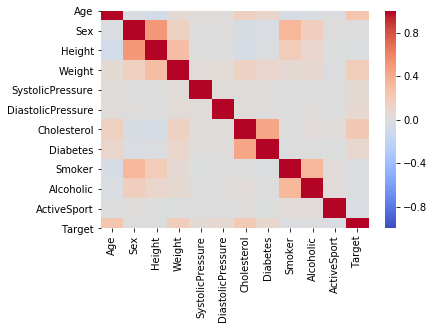

In [10]:
sns.heatmap(df_stroke.corr(), cmap='coolwarm', center=0,vmin=-1, vmax=1)

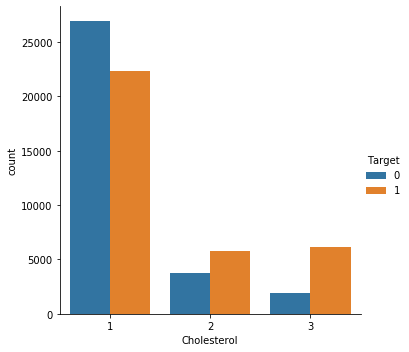

In [11]:
#We see that the target is mainly correlated to Cholesterol, Weigth and Age
sns.catplot(kind = 'count', data = df_stroke, x = 'Cholesterol', hue = 'Target');

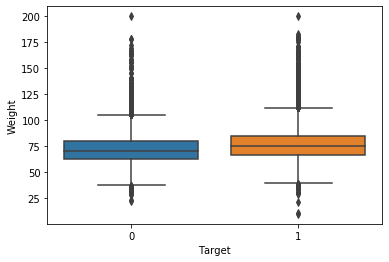

In [12]:
sns.boxplot(x='Target',y='Weight',data=df_stroke)

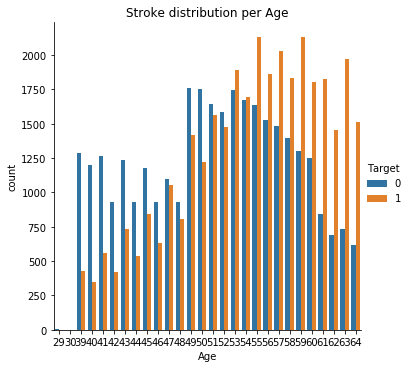

In [13]:
# Plot the target depending on the Age
sns.catplot(kind = 'count', data = df_stroke, x = 'Age', hue = 'Target', order = df_stroke['Age'].sort_values().unique());
plt.title('Stroke distribution per Age');

#The older, the higher the number of strokes.

In [14]:
df_stroke.to_csv('stroke_data_for_modeling.csv', sep=';')